In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [6]:
# This method will download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
# check english stop words.
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [8]:
df = pd.read_csv('/content/drive/MyDrive/train.csv')

In [9]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


# Find Null values in dataset in each column

In [10]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

# Fill Columns of dataset
1. title by '' (empty string)
2. author by unknown
3. text by '' (empty string)


In [11]:
df['title'] = df['title'].fillna('')
df['author'] = df['author'].fillna('unknown')
df['text'] = df['text'].fillna('')

In [12]:
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [13]:
X = df.drop(columns=['label','author'], axis = 1)
Y = df['label']

In [14]:
X.head()

,id,title,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...


# Check Balance of Dataset

In [15]:

classes = df['label'].value_counts()
classes

1    10413
0    10387
Name: label, dtype: int64

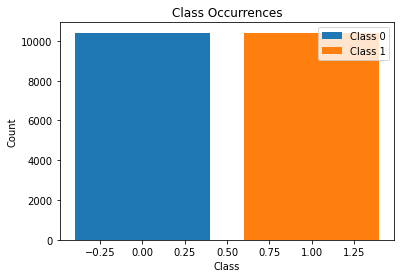

In [16]:
import matplotlib.pyplot as plt


# Create a figure and an axis
fig, ax = plt.subplots()

# Plot the bar chart
ax.bar(0, classes[0], label='Class 0')
ax.bar(1, classes[1], label='Class 1')

# Add labels and a title
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_title('Class Occurrences')

# Add a legend
ax.legend()

# Show the plot
plt.show()


Stemming

In [17]:
port_stem = PorterStemmer()

In [18]:
def Stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    
    return stemmed_content

In [19]:
df['title'] = df['title'].apply(Stemming)

In [20]:
X = df['title']
Y = df['label']
X.head()

0    hous dem aid even see comey letter jason chaff...
1      flynn hillari clinton big woman campu breitbart
2                                 truth might get fire
3             civilian kill singl us airstrik identifi
4    iranian woman jail fiction unpublish stori wom...
Name: title, dtype: object

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [22]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)


In [23]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [24]:
model = LogisticRegression()

In [25]:
model.fit(X_train, Y_train)

LogisticRegression()

In [26]:
X_train_pred = model.predict(X_train)
training_acc = accuracy_score(X_train_pred, Y_train)
print("Accuracy Score on Training Data", training_acc)

Accuracy Score on Training Data 0.9417067307692307


In [27]:
X_test_prediction = model.predict(X_test)
test_data_acc = accuracy_score(X_test_prediction, Y_test)
print("Accuracy Score on Test Data : ", test_data_acc)

Accuracy Score on Test Data :  0.9199519230769231


In [28]:
from sklearn.svm import SVC

In [29]:
svm_model = SVC()

In [30]:
svm_model.fit(X_train, Y_train)

SVC()

In [31]:
svm_X_train_pred = svm_model.predict(X_train)
svm_train_acc =accuracy_score(svm_X_train_pred, Y_train)
print("Accuracy Score on Training Data", svm_train_acc)

Accuracy Score on Training Data 0.99296875


In [32]:
svm_X_test_prediction = svm_model.predict(X_test)
test_data_acc = accuracy_score(svm_X_test_prediction, Y_test)
print("Accuracy Score on Test Data", test_data_acc)

Accuracy Score on Test Data 0.9254807692307693


# Decission Tree

In [33]:
from sklearn import tree


In [34]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

In [35]:
dt_train_pred = clf.predict(X_train)
dt_train_acc = accuracy_score(dt_train_pred, Y_train)
print("Training Accuracy : ", dt_train_acc)

Training Accuracy :  1.0


In [36]:
dt_test_pred  = clf.predict(X_test)
dt_test_acc = accuracy_score(dt_test_pred, Y_test)
print("Testing Accuracy : ", dt_test_acc)

Testing Accuracy :  0.9175480769230769


Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
Rclf = RandomForestClassifier(max_depth=100, random_state=0)
Rclf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=100, random_state=0)

In [39]:
RF_train_pred = Rclf.predict(X_train)
RF_train_acc = accuracy_score(RF_train_pred, Y_train)
print("Random Forest Training Accuracy : ", RF_train_acc)

Random Forest Training Accuracy :  0.9622596153846154


In [40]:
RF_test_pred = Rclf.predict(X_test)
RF_test_acc = accuracy_score(RF_test_pred, Y_test)
print("Random Forest Test Accuracy : ", RF_test_acc)

Random Forest Test Accuracy :  0.9254807692307693


# **Gradient Boosting **

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

In [42]:
GBclf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=10, random_state=42)
GBclf.fit(X_train, Y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=200, random_state=42)

In [43]:
GB_train_pred = GBclf.predict(X_train)
GB_train_acc = accuracy_score(GB_train_pred, Y_train)
print("Training Accuracy of Gradient Boosting : ", GB_train_acc)

Training Accuracy of Gradient Boosting :  0.9646634615384615


In [86]:
GB_test_pred = GBclf.predict(X_test)
GB_test_acc = accuracy_score(GB_test_pred, Y_test)
print("Training Accuracy of Gradient Boosting : ", GB_test_acc)

Training Accuracy of Gradient Boosting :  0.9274038461538462


# Test Model

In [95]:
X_new = X_test[3]
print(X_new)
prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')